# Исследование и Предобработка данных


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('wine.csv')

# Первичный осмотр данных
print('Первые пять строк датасета:\n\n',df.head())
print('\nСтруктура датасета:\n')
df.info()
print('\nХарактеристики числовых значений датасета:\n\n',df.describe())

Первые пять строк датасета:

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1 

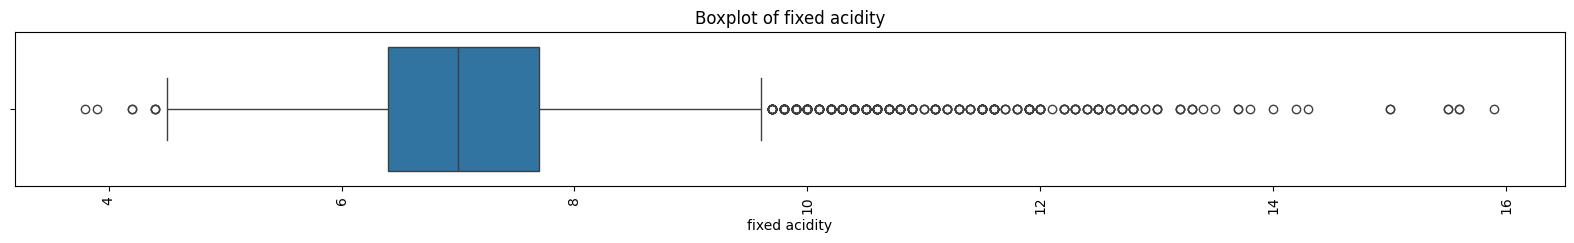

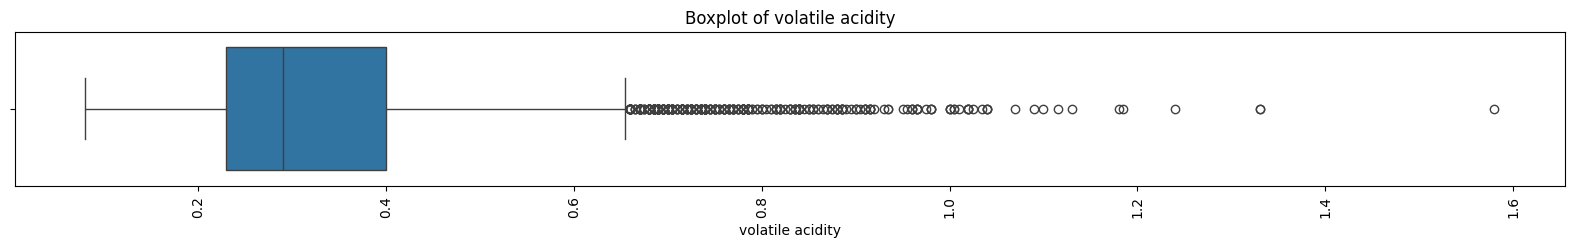

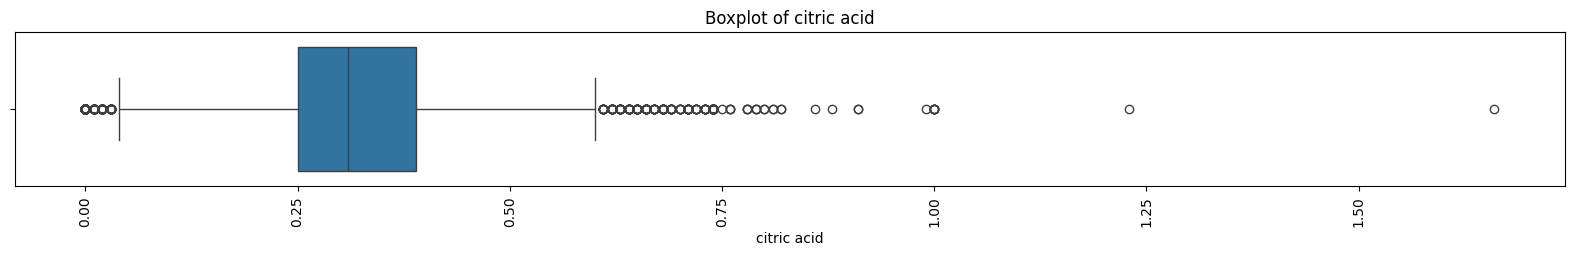

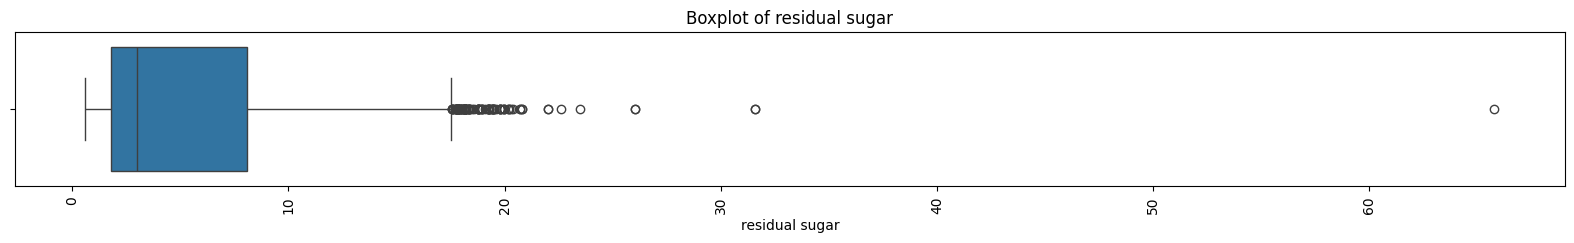

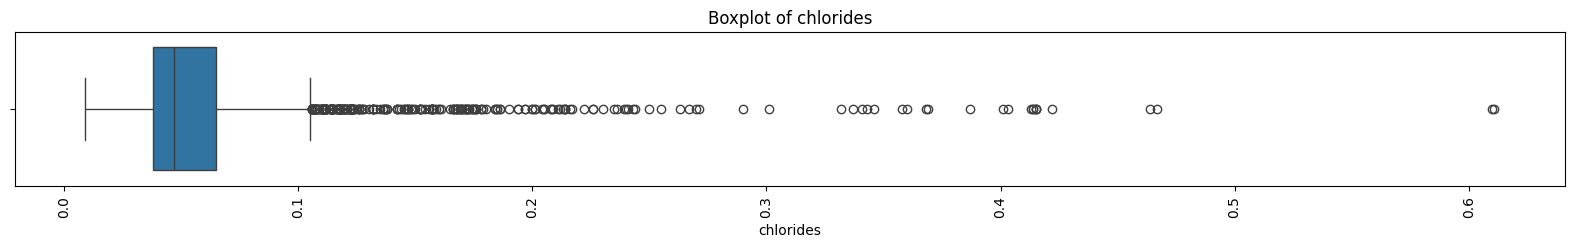

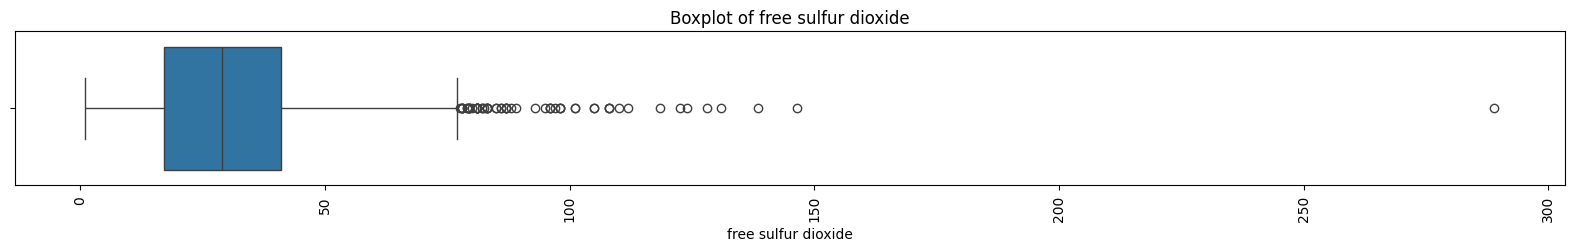

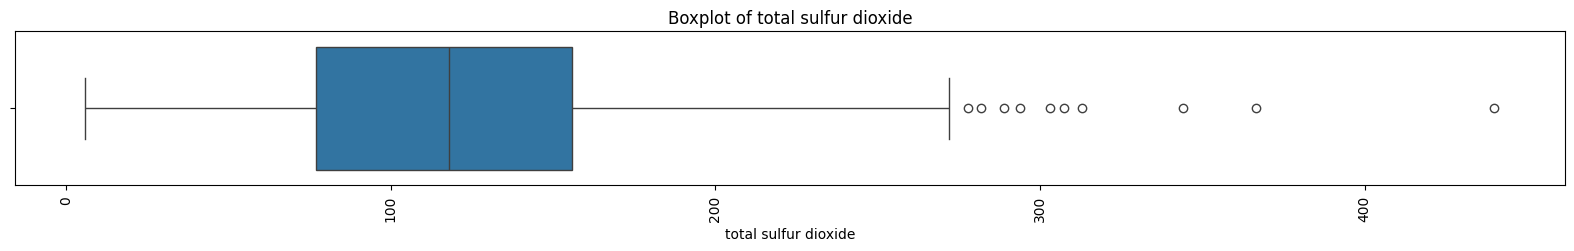

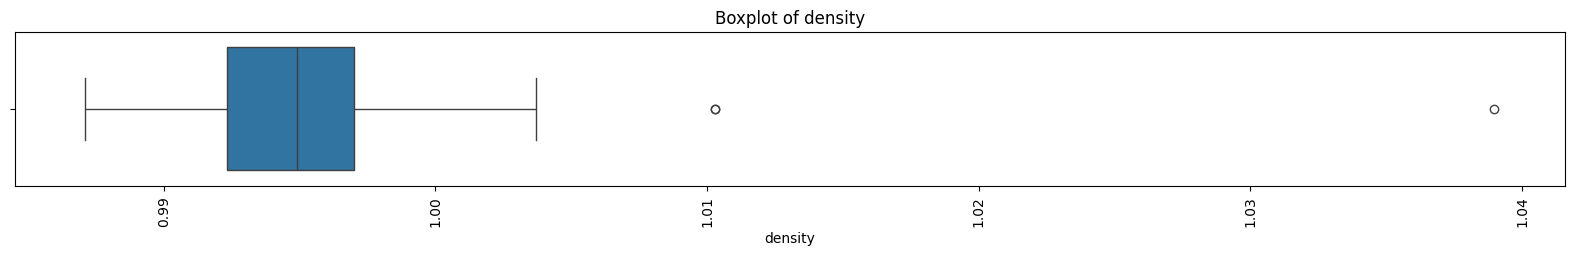

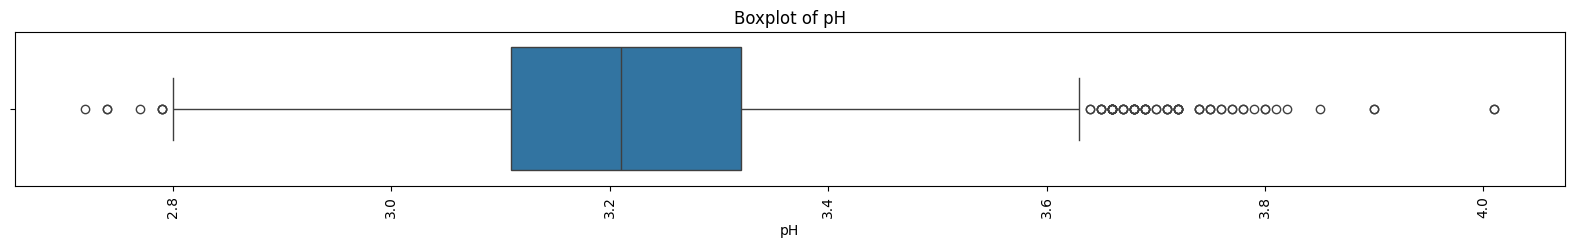

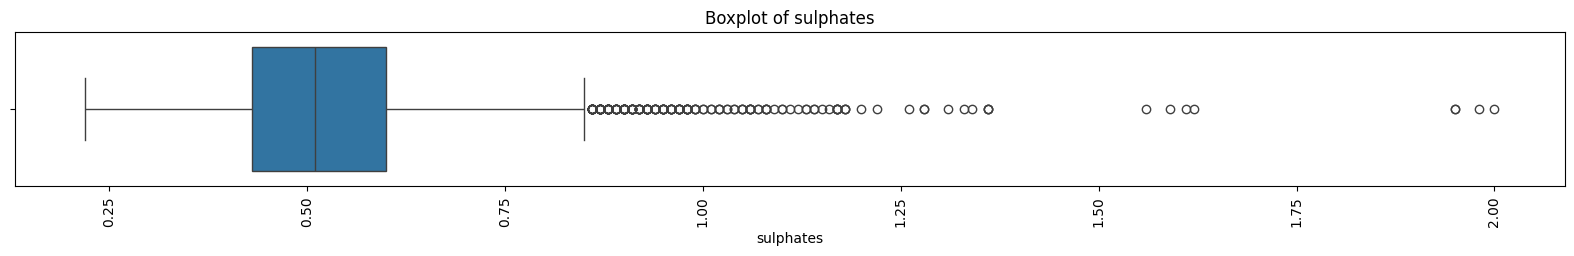

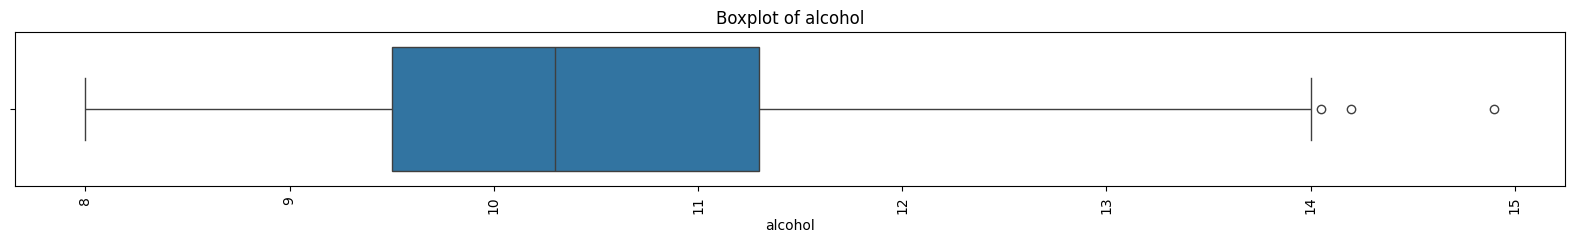

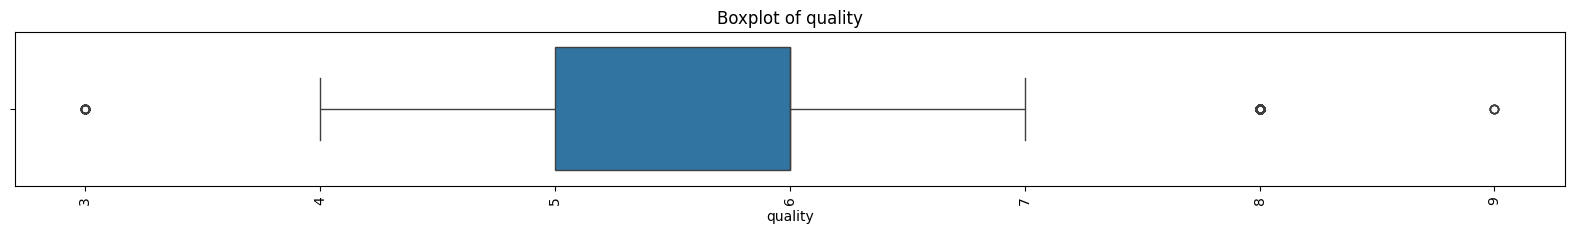

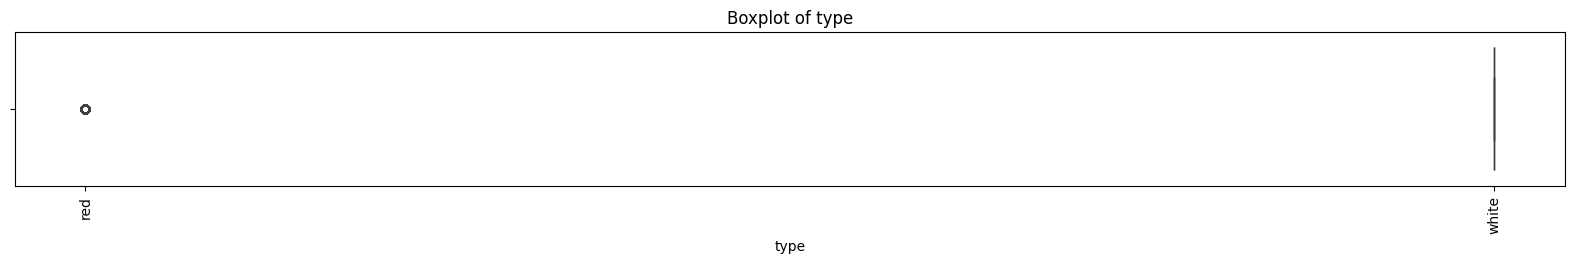

In [232]:
# Усы для данных
cols = df.columns
for col in cols:
  plt.figure(figsize=(20, 2))
  sns.boxplot(x=col, data=df)
  plt.title(f'Boxplot of {col}')
  plt.xticks(rotation=90)
  plt.show()


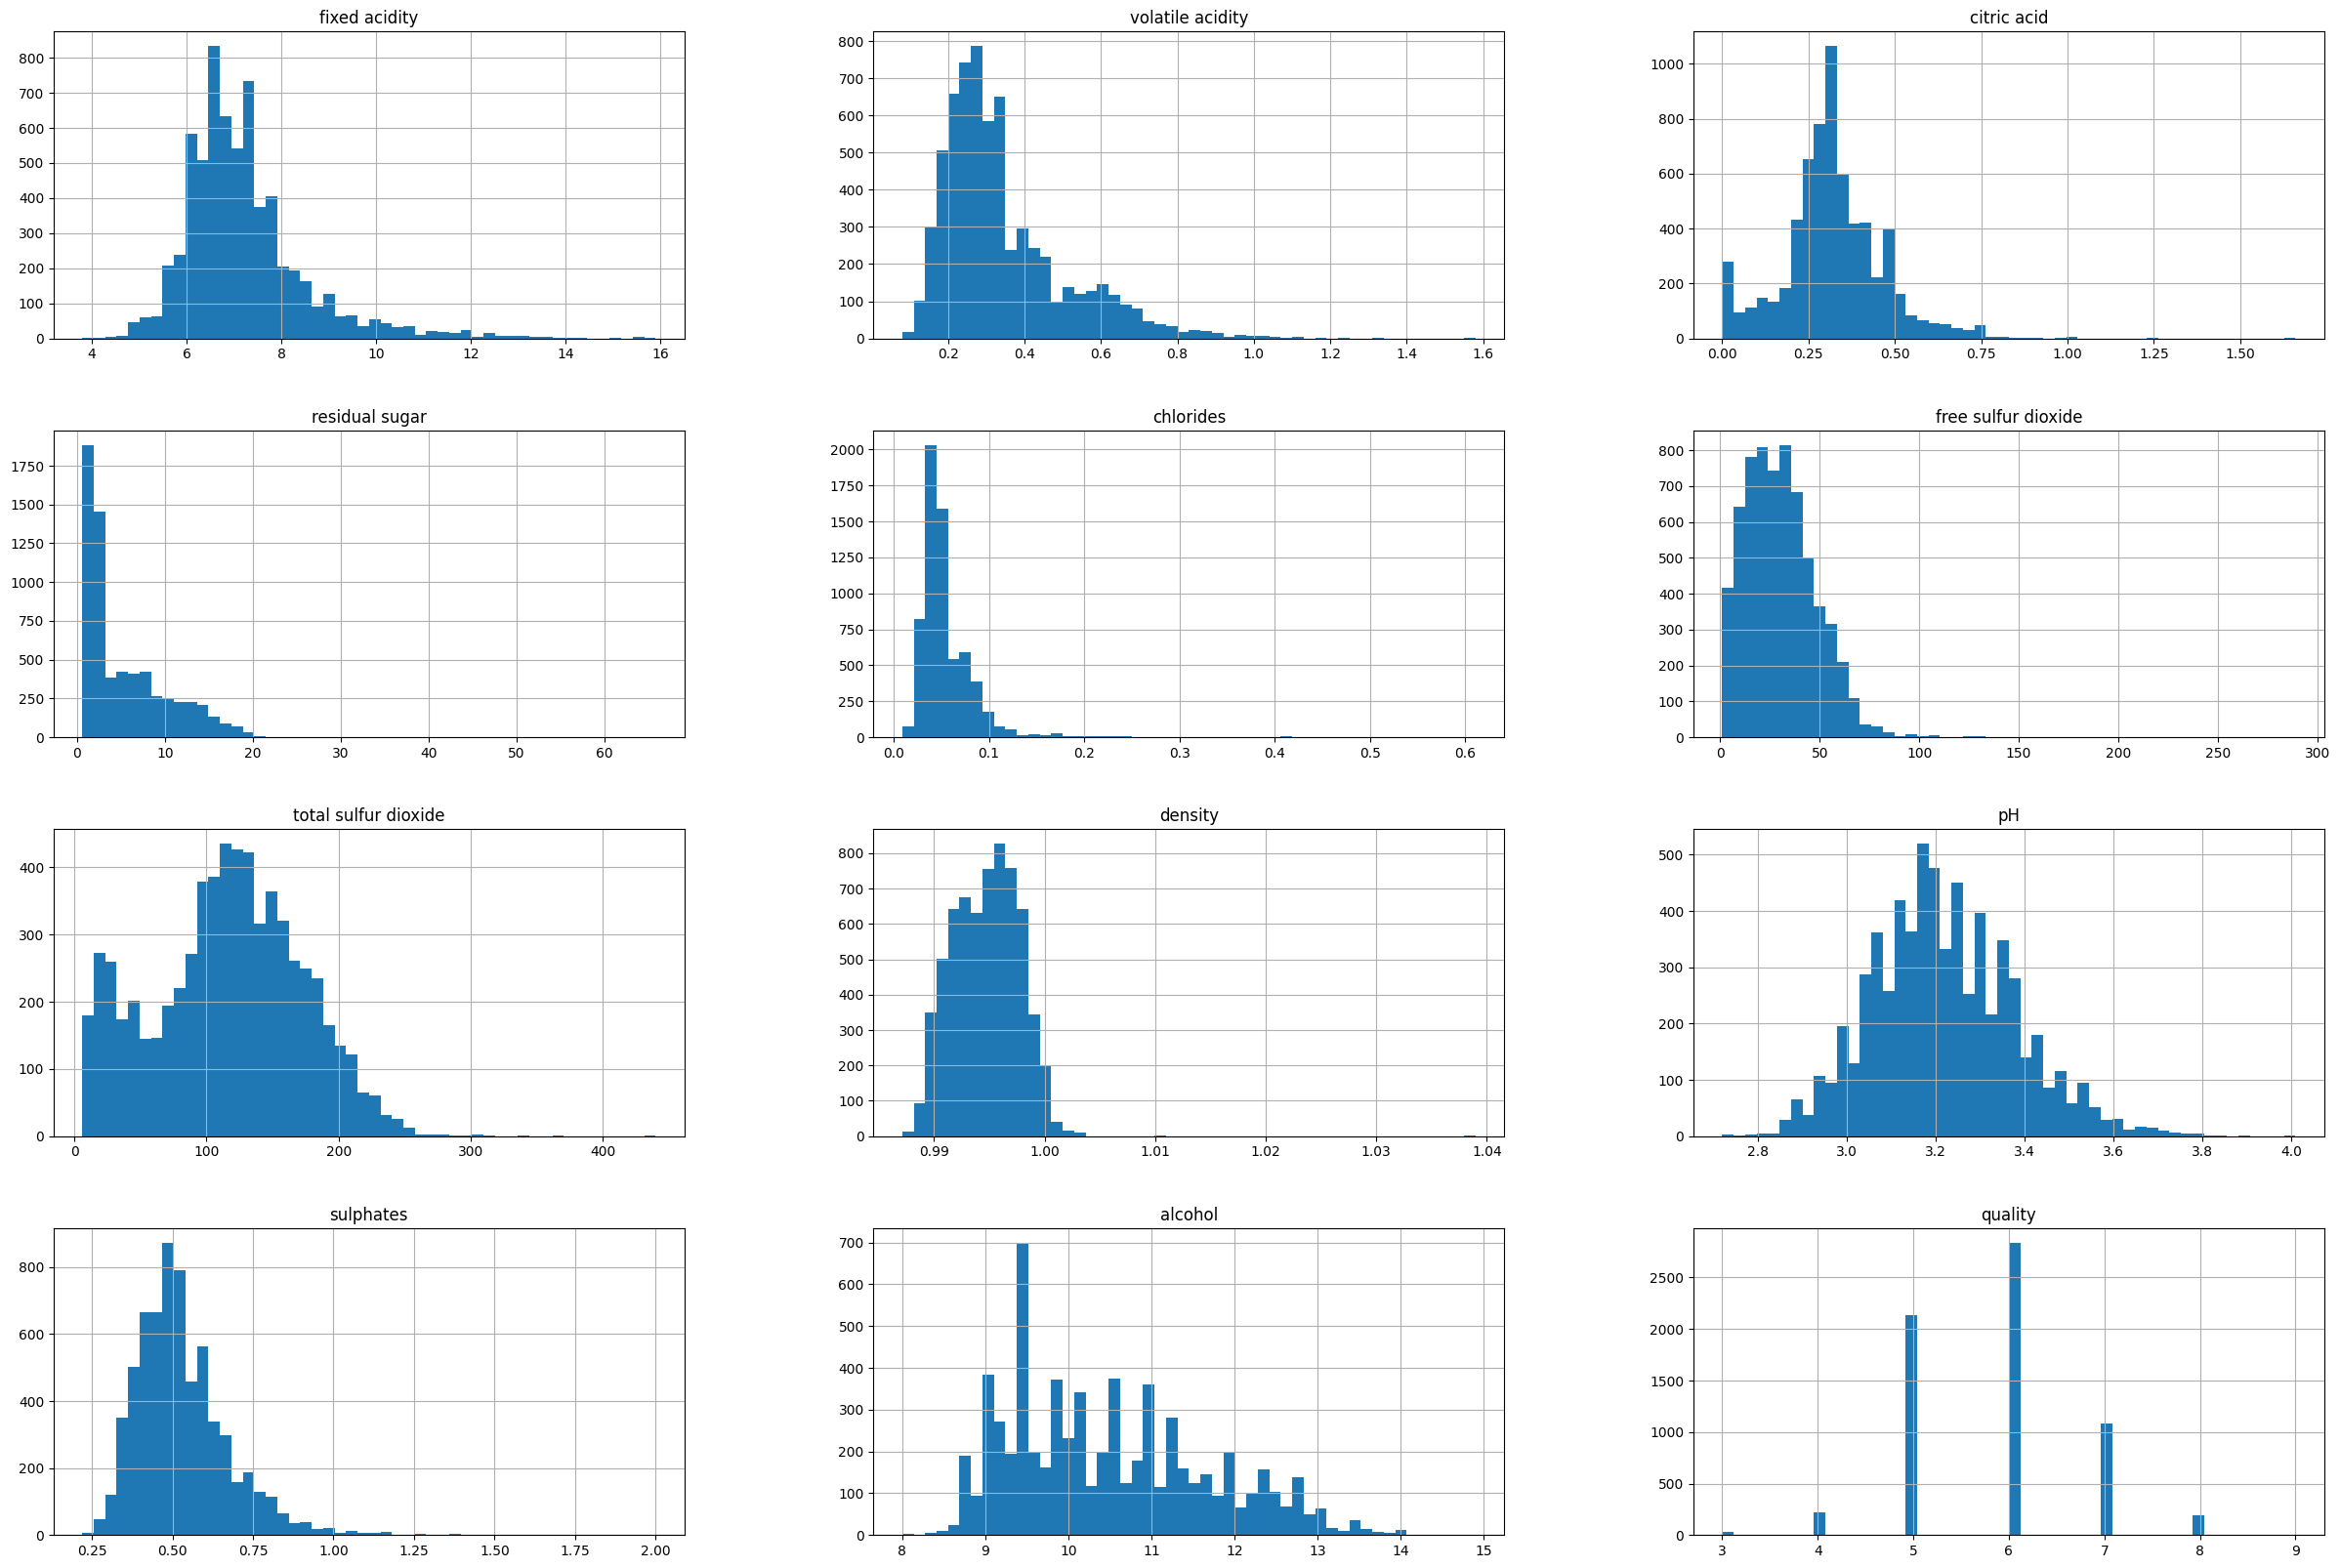

In [233]:
# Гистограммы распределения данных
df.hist(bins=50, figsize=(30,20))
plt.show()

In [246]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['number']).columns
numerical_features=numerical_features.tolist()

scaler = StandardScaler()
numeric_df = df.select_dtypes(include='number')
df_scaled = scaler.fit_transform(numeric_df)
df_scaled=pd.DataFrame(df_scaled,columns=[numerical_features])
df_drop = df.drop(columns=numerical_features)

#df_norm =pd.merge(df_scaled, df_drop,  left_index=True, right_index=True)
df_norm = pd.concat([df_drop,df_scaled], axis=1)
print('\nНормализованный датафрейм:\n')
df_norm.head()


Нормализованный датафрейм:



,type,"(fixed acidity,)","(volatile acidity,)","(citric acid,)","(residual sugar,)","(chlorides,)","(free sulfur dioxide,)","(total sulfur dioxide,)","(density,)","(pH,)","(sulphates,)","(alcohol,)","(quality,)"
0,red,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,red,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,red,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,red,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,red,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


In [247]:
# закодируем данные через LabelEncoder
from sklearn.preprocessing import LabelEncoder

category_df = df_norm.select_dtypes(include='object')
categorical_features = category_df.columns.tolist()

encoder_le = LabelEncoder()
for each in categorical_features:
    category_df[each] = encoder_le.fit_transform(category_df[each])
    category_df_check=encoder_le.classes_

numeric_df = df.select_dtypes(include='number')
new_df =pd.merge(numeric_df, category_df,  left_index=True, right_index=True)
print('\nПреобразованный датафрейм:\n')
new_df.head()



Преобразованный датафрейм:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


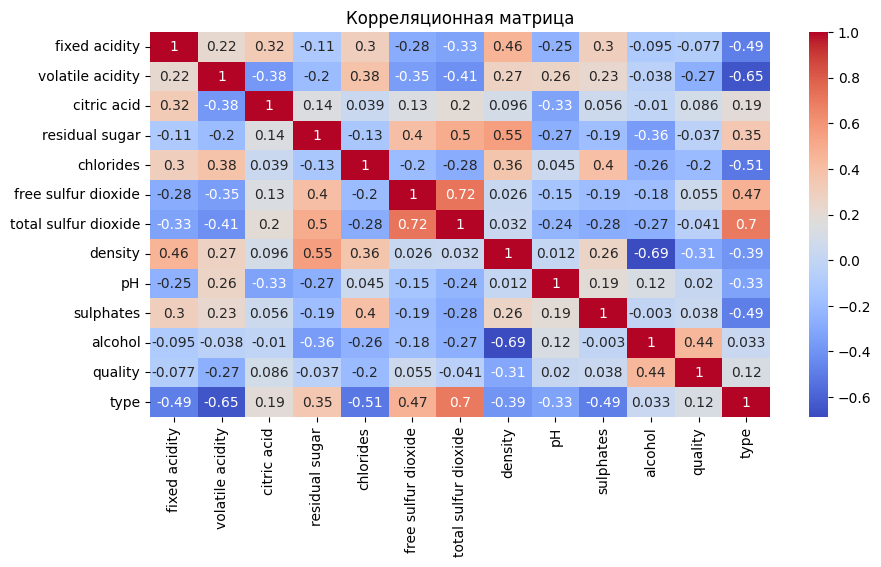

In [236]:
# Корреляционная матрица
plt.figure(figsize=(10, 5))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [237]:
# Проверка на пропущенные значения
missing_values = new_df.isnull().sum()
print("Пропущенные значения в каждом столбце:\n\n", missing_values)

Пропущенные значения в каждом столбце:

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [248]:
rows, columns = new_df.shape
print(f'Количество строк: {rows}')
print(f'Количество столбцов: {columns}')

#print('\nНаименование столбцов: \n',df.columns)

Количество строк: 6497
Количество столбцов: 13


In [252]:
# Проверка наличия дубликатов
duplicates = new_df.duplicated()
print(f"Количество дублирующихся строк: {duplicates.sum()}")

# Удаление дубликатов
new_df = new_df.drop_duplicates()

# Проверка количества строк после удаления дубликатов
print(f"Количество строк после удаления дубликатов: {new_df.shape[0]}")


Количество дублирующихся строк: 1177
Количество строк после удаления дубликатов: 5320


# Решение задачи сегментации

In [253]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#KMeans

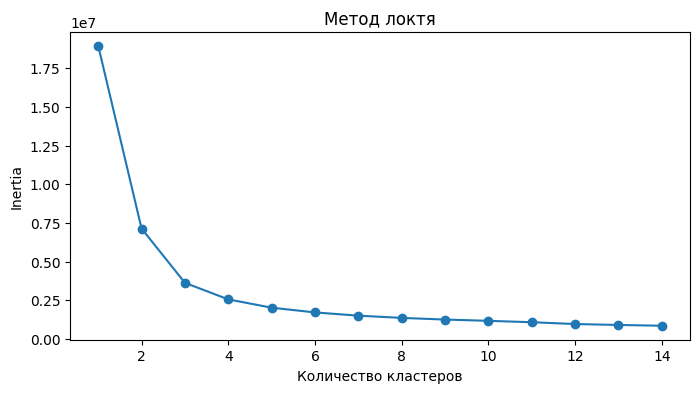

In [254]:
# Определение оптимального количества кластеров с использованием метода "локтя"
inertia = []
for n in range(1, 15):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.show()


Метрики качества:

 Silhouette Score: 0.42
Davies-Bouldin Index: 0.77
Inertia: 2015052.19
Calinski-Harabasz Index: 11174.51

Распределение по кластерам:
 {0: 538, 1: 1087, 2: 996, 3: 1505, 4: 1194}




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


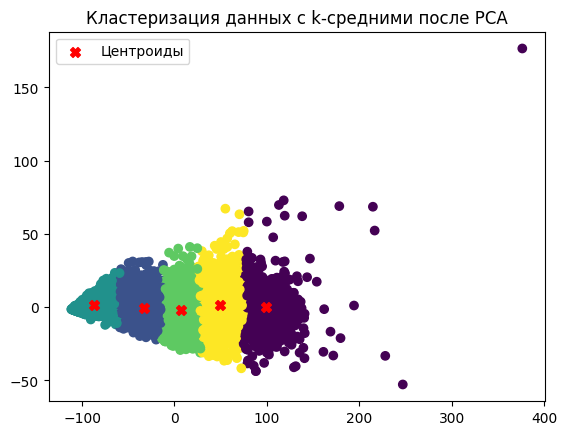

In [268]:
# Инициализируем модель KMeans с 5 кластерами
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(new_df)

 # Оценка метрик
silhouette_avg_kmeans = silhouette_score(new_df, y_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(new_df, y_kmeans)
inertia = kmeans.inertia_
calinski_harabasz_kmeans = calinski_harabasz_score(new_df, y_kmeans)
print('\nМетрики качества:\n')
print(f" Silhouette Score: {silhouette_avg_kmeans:.2f}\nDavies-Bouldin Index: {davies_bouldin_kmeans:.2f}\nInertia: {inertia:.2f}\nCalinski-Harabasz Index: {calinski_harabasz_kmeans:.2f}")

 # Сколько попало в кластеры
unique, counts = np.unique(y_kmeans, return_counts=True)
print('\nРаспределение по кластерам:\n',dict(zip(unique, counts)))
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=50, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

# Кластеризация со средним сдвигом.

Метрики качества:

Силуэтовская оценка: 0.35
Индекс Дэвиса-Болдуина: 0.57
Индекс Калински-Харабаса: 2441.26

Распределение по классам:
 {0: 3293, 1: 1285, 2: 130, 3: 404, 4: 2, 5: 2, 6: 202, 7: 1, 8: 1}




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


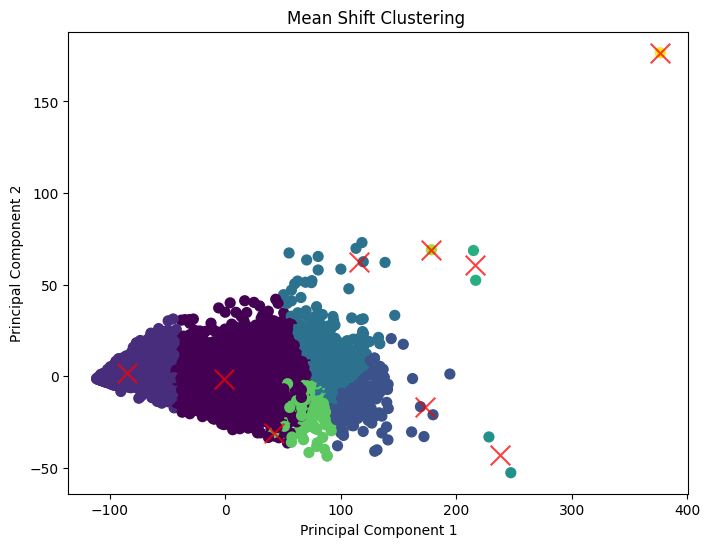

In [257]:
# Оценка ширины полосы пропускания (bandwidth) для алгоритма MeanShift
bandwidth = estimate_bandwidth(new_df, quantile=0.2, n_samples=500)

# Инициализируем модель с использованием алгоритма со средним сдвигом
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(new_df)
y_shift = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Вычисление метрик качества
silhouette_avg_MeanShift = silhouette_score(new_df, y_shift)
davies_bouldin_MeanShift = davies_bouldin_score(new_df, y_shift)
calinski_harabasz_MeanShift = calinski_harabasz_score(new_df, y_shift)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg_MeanShift:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin_MeanShift:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz_MeanShift:.2f}")

 # Сколько попало в кластеры
unique, counts = np.unique(y_shift, return_counts=True)
print('\nРаспределение по классам:\n',dict(zip(unique, counts)))
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Визуализация исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_shift, s=50, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Mean Shift Clustering ")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Спектральная кластеризация.

Метрики качества:

Силуэтовская оценка: 0.40
Индекс Дэвиса-Болдуина: 0.72
Индекс Калински-Харабаса: 9769.91

Распределение по классам:
 {0: 1503, 1: 1705, 2: 503, 3: 805, 4: 804}




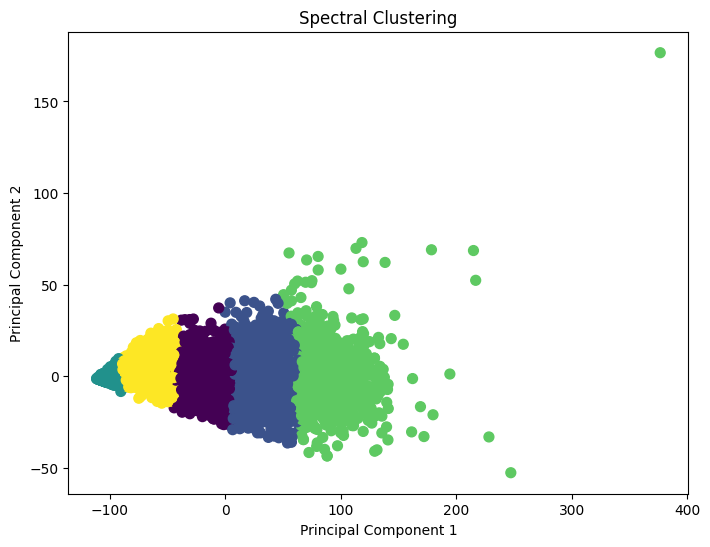

In [258]:
# Инициализируем модель спектральной кластеризации SpectralClustering
n_clusters = 5  # Устанавливаем количество кластеров
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(new_df)

# Вычисление метрик качества
silhouette_avg_spectral = silhouette_score(new_df, y_spectral)
davies_bouldin_spectral = davies_bouldin_score(new_df, y_spectral)
calinski_harabasz_spectral = calinski_harabasz_score(new_df, y_spectral)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg_spectral:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin_spectral:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz_spectral:.2f}")

 # Сколько попало в кластеры
unique, counts = np.unique(y_spectral, return_counts=True)
print('\nРаспределение по классам:\n',dict(zip(unique, counts)))
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Визуализация кластеров после спектральной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_spectral, s=50, cmap='viridis')

plt.title("Spectral Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Агломеративная кластеризация

In [19]:
#sample_data = new_df[:2000]  # Использование случайной выборки данных

Метрики качества:

Силуэтовская оценка: 0.38
Индекс Дэвиса-Болдуина: 0.77
Индекс Калински-Харабаса: 9525.91

Распределение по классам:
 {0: 1503, 1: 1705, 2: 503, 3: 805, 4: 804}




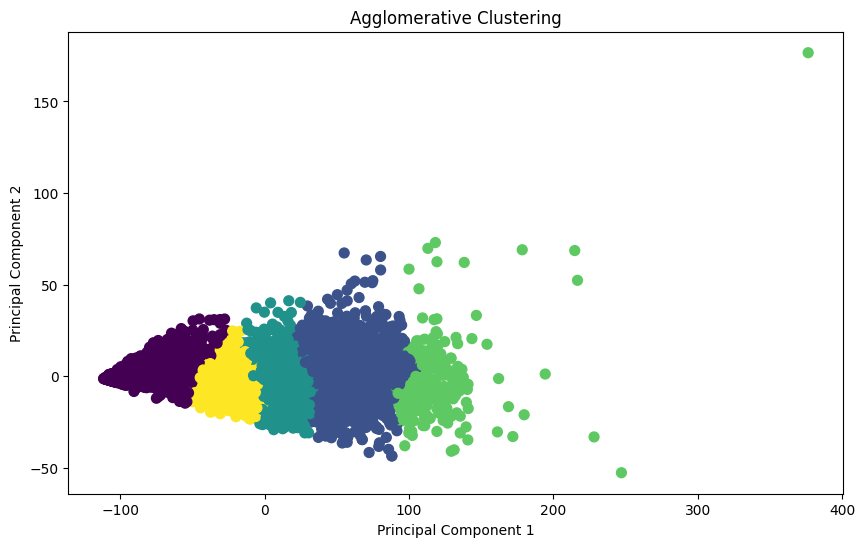

In [259]:
# Применение агломеративной кластеризации

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

n_clusters = 5  # Устанавливаем количество кластеров
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') #(метод вычисления расстояний)
y_Agg = agg_clustering.fit_predict(new_df)


# Вычисление метрик качества
silhouette_avg_Agg = silhouette_score(new_df, y_Agg)
davies_bouldin_Agg = davies_bouldin_score(new_df, y_Agg)
calinski_harabasz_Agg = calinski_harabasz_score(new_df, y_Agg)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg_Agg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin_Agg:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz_Agg:.2f}")

 # Сколько попало в кластеры
unique, counts = np.unique(y_spectral, return_counts=True)
print('\nРаспределение по классам:\n',dict(zip(unique, counts)))
print('\n')

# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_Agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Иерархическая кластеризация
 Дендрограмма - поиск наилучшего способа распределения объектов по кластерам

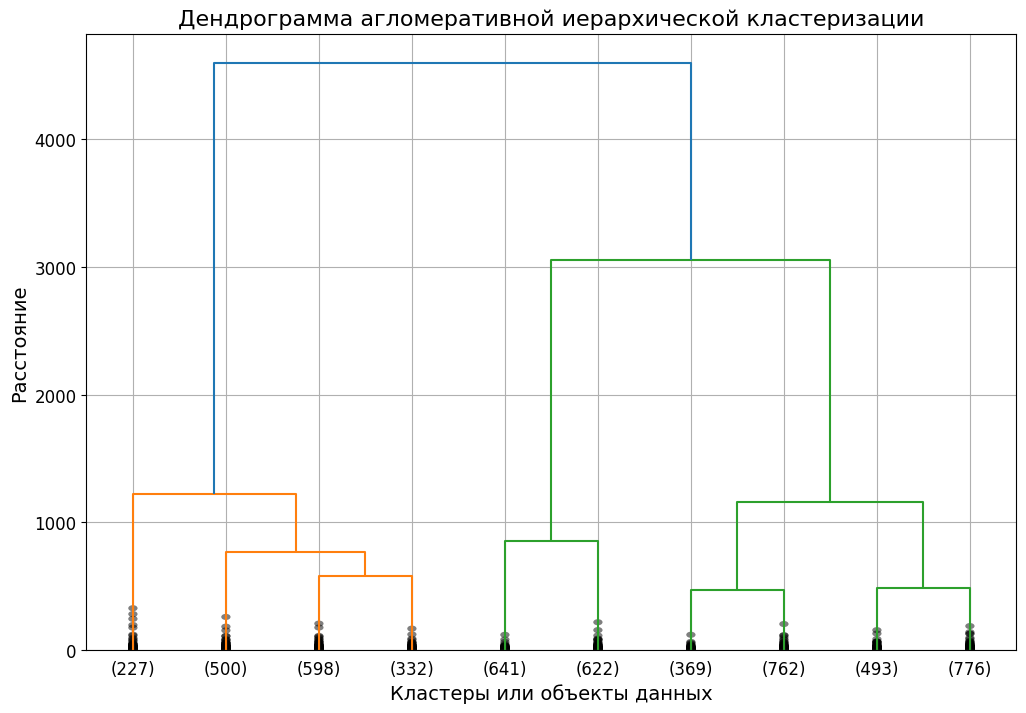

In [260]:
# Применение агломеративной кластеризации с использованием SciPy
linkage_matrix = linkage(new_df, method='ward')
# Визуализация дендрограммы с улучшением читаемости
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_font_size=12, show_contracted=True)
plt.title('Дендрограмма агломеративной иерархической кластеризации', fontsize=16)
plt.xlabel('Кластеры или объекты данных', fontsize=14)
plt.ylabel('Расстояние', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Выбираем точку отсечения, которая отсекает самую высокую вертикальную линию. Количество пересечений вертикальной линии с горизонтальной линией даст количество кластеров.

In [191]:
# Получение кластерных меток с использованием fcluster
n_clusters = 3  # Задаем количество кластеров
fcluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Вычисление метрик качества
silhouette_avg_dd = silhouette_score(new_df, fcluster_labels)
davies_bouldin_dd = davies_bouldin_score(new_df, fcluster_labels)
calinski_harabasz_dd = calinski_harabasz_score(new_df, fcluster_labels)

print(f"Силуэтовская оценка: {silhouette_avg_dd:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin_dd:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz_dd:.2f}")

Силуэтовская оценка: 0.46
Индекс Дэвиса-Болдуина: 0.66
Индекс Калински-Харабаса: 11670.25


# DBSCAN плотностной алгоритм

Метрики качества:

Силуэтовская оценка: -0.04
Индекс Дэвиса-Болдуина: 2.11
Индекс Калински-Харабаса: 292.41

Распределение по классам:
 {-1: 438, 0: 6026, 1: 21, 2: 12}




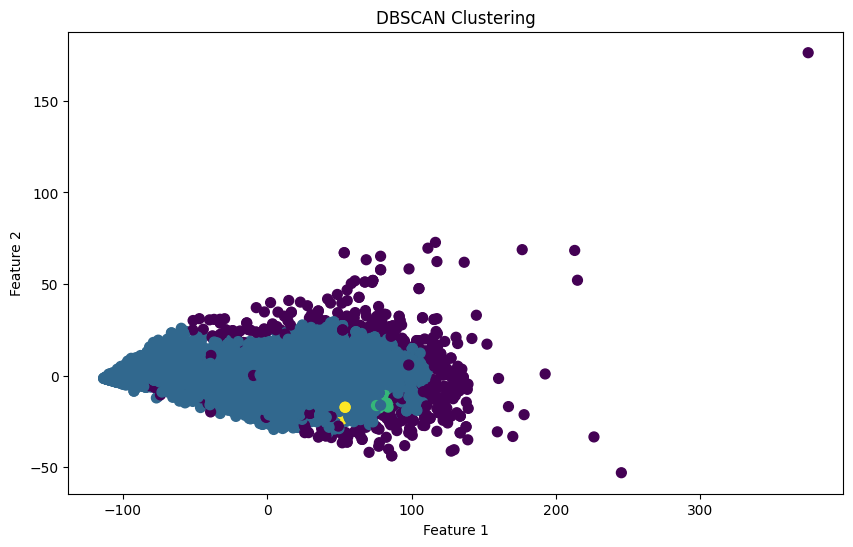

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  cluster  
0      9.4        5     0        0  
1      9.8  

In [184]:
# Применение DBSCAN
dbscan = DBSCAN(eps=6.6, min_samples=20)
y_dbscan = dbscan.fit_predict(new_df)

# Вычисление метрик качества
silhouette_avg_dbscan = silhouette_score(new_df, y_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(new_df, y_dbscan)
calinski_harabasz_dbscan = calinski_harabasz_score(new_df, y_dbscan)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

 # Сколько попало в кластеры
unique, counts = np.unique(y_dbscan, return_counts=True)
print('\nРаспределение по классам:\n',dict(zip(unique, counts)))
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Присвоение меток кластеров к исходному датасету
new_df['cluster'] = y_dbscan

# Обзор результатов кластеризации
print(new_df.head())

In [261]:
# Сравнение метрик качества моделей
print(f'Сравнение метрик качества:')
results_metrics = pd.DataFrame([
  ['Кластеризация K-средних KMeans', silhouette_avg_kmeans,davies_bouldin_kmeans,calinski_harabasz_kmeans,'5'],
  ['Кластеризация со средним сдвигом MeanShift',  silhouette_avg_MeanShift,davies_bouldin_MeanShift,calinski_harabasz_MeanShift,'7'],
  ['Cпектральная кластеризация',  silhouette_avg_spectral,davies_bouldin_spectral,calinski_harabasz_spectral,'5'],
  ['Агломеративная кластеризация',  silhouette_avg_Agg,davies_bouldin_Agg,calinski_harabasz_Agg,'5'],
  ['Иерархическая через дендрограмму',  silhouette_avg_dd,davies_bouldin_dd,calinski_harabasz_dd,'3'],
  ['DBSCAN плотностной алгоритм',  silhouette_avg_dbscan,davies_bouldin_dbscan,calinski_harabasz_dbscan,'-']],
  columns=['Алгоритм','Силуэтовская оценка', 'Индекс Дэвиса-Болдуина','Индекс Калински-Харабаса','Количество кластеров'])
display(results_metrics)


Сравнение метрик качества:


,Алгоритм,Силуэтовская оценка,Индекс Дэвиса-Болдуина,Индекс Калински-Харабаса,Количество кластеров
0,Кластеризация K-средних KMeans,0.418570,0.767442,11174.505063,5
1,Кластеризация со средним сдвигом MeanShift,0.349123,0.569448,2441.263038,7
2,Cпектральная кластеризация,0.398228,0.722384,9769.907418,5
3,Агломеративная кластеризация,0.382664,0.771107,9525.909345,5
4,Иерархическая через дендрограмму,0.459268,0.658743,11670.245604,3
5,DBSCAN плотностной алгоритм,-0.038878,2.105499,292.410711,-


#ВЫВОДЫ:

**Метод DBSCAN не выдает желаемых метрик при эмпирическом подборе параметров eps (радиус окрестности) и min_samples (минимальное количество точек в окрестности для формирования кластера)**

**Кластеризация со средним сдвигом автоматически сегментировала данные на 7 частей, показав слабые метрики**

**При ручном вводе количества кластеров = 5 из алгоритмов: К-средних, спектральной и алгомеративной, лучшей показала себя первая кластеризация**

**При сегментации через Иерархический алгоритм с помощью дендрограммы, выбрав количество кластеров = 3 получаем наибольшую Силуэтовская оценку, наименьший Индекс Дэвиса-Болдуина и достаточную плотность**

***Некоторые методы кластеризации могут быть чувствительными к аномалиям, что может влиять на точность и качество их результатов, напрмиер K-Means**

**Попробуем произвести детекцию аномлаий**

#Метод Z-Score
*позволяет выявлять аномалии, измеряя, насколько далеко значения отклоняются от среднего значения в терминах стандартных отклонений*

In [262]:
# Вычисление Z-Score для каждого признака
z_scores = (new_df - new_df.mean()) / new_df.std()

# Установка порога
threshold = 3

# Фильтрация аномальных данных
anomalies = (np.abs(z_scores) > threshold).any(axis=1)
# Удаление строк с Z-Score, превышающим определенный порог
cleaned_df = new_df [~anomalies]

# Печать количества оставшихся данных
print(f"Количество строк до очистки от аномалий: {new_df.shape[0]}")
print(f"Количество строк после очистки от аномалий: {cleaned_df.shape[0]}")


Количество строк до очистки от аномалий: 5320
Количество строк после очистки от аномалий: 4869



Метрики качества:

Полученные:
  Silhouette Score: 0.41, Davies-Bouldin Index: 0.76, Inertia: 1556515.53, Calinski-Harabasz Index: 11168.23
Исходные:
  Silhouette Score: 0.42, Davies-Bouldin Index: 0.77, Inertia: 2015052.19, Calinski-Harabasz Index: 11174.51

Распределение по кластерам:
 {0: 1094, 1: 983, 2: 801, 3: 618, 4: 1373}




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


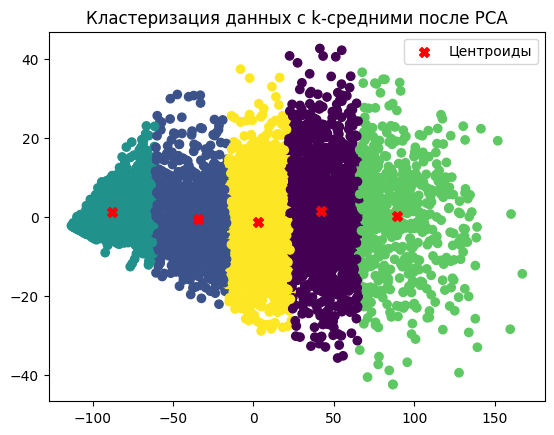

In [271]:
# Инициализируем модель KMeans с 5 кластерами
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(cleaned_df)

 # Оценка метрик
silhouette_avg_kmeans_z = silhouette_score(cleaned_df, y_kmeans)
davies_bouldin_kmeans_z = davies_bouldin_score(cleaned_df, y_kmeans)
inertia_z = kmeans.inertia_
calinski_harabasz_kmeans_z = calinski_harabasz_score(cleaned_df, y_kmeans)
print('\nМетрики качества:\n')
print('Полученные:\n',f" Silhouette Score: {silhouette_avg_kmeans_z:.2f}, Davies-Bouldin Index: {davies_bouldin_kmeans_z:.2f}, Inertia: {inertia_z:.2f}, Calinski-Harabasz Index: {calinski_harabasz_kmeans_z:.2f}")
print('Исходные:\n',f" Silhouette Score: {silhouette_avg_kmeans:.2f}, Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}, Inertia: {inertia:.2f}, Calinski-Harabasz Index: {calinski_harabasz_kmeans:.2f}")

 # Сколько попало в кластеры
unique, counts = np.unique(y_kmeans, return_counts=True)
print('\nРаспределение по кластерам:\n',dict(zip(unique, counts)))
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cleaned_df)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=50, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

#ВЫВОД:

**Метод K-Means существено не изменил метрики после проведения детекции аномалий**